In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
from scipy import stats
import itertools

data_dir = path.join("/home/katelyn/Documents/COSC490/Stemming/Data","gov2")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]

MARKERS = ["o","^","s","*","d", "P", "X"]
marker = itertools.cycle(MARKERS)

## Preparing Data

In [16]:
data = pd.read_csv(path.join(data_dir,"map_gov2"), sep="\\s+")
data_avg = data[data["qid"] == "all"]
data = data.drop(data[data["qid"] == "all"].index)
display(data_avg)

,stemmer,qid,map
149,paiceHusk,all,0.1136
299,krovetz,all,0.1178
449,sStripping,all,0.1173
599,porter2,all,0.1226
749,lovins,all,0.1117
899,wikt,all,0.1149
1049,none,all,0.1060


## MAP

<Axes: xlabel='stemmer', ylabel='map'>

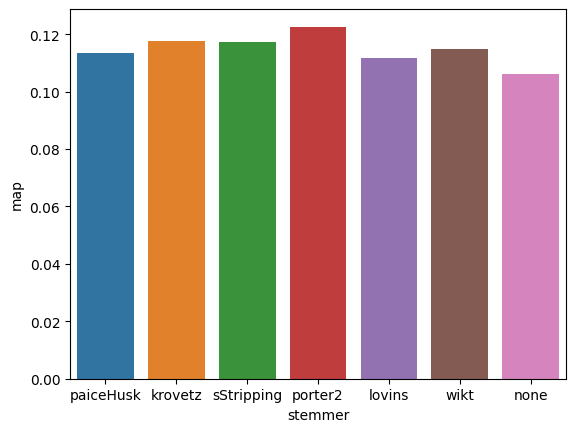

In [17]:
sns.barplot(data=data_avg, x="stemmer", y="map", hue="stemmer")

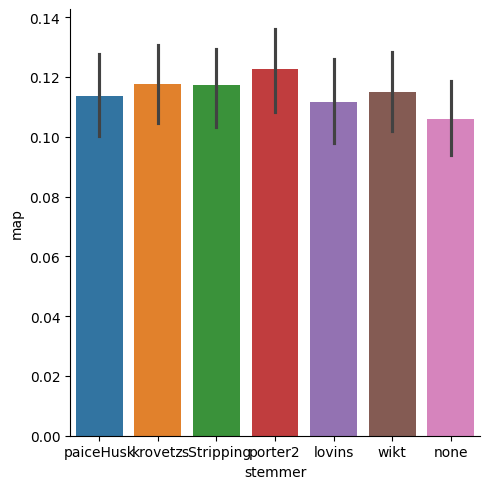

In [22]:
sns.catplot(data=data, kind="bar", x="stemmer", y="map", hue="stemmer")

## Linguistic Accuracy

In [28]:
target = data_avg[data_avg["stemmer"] != "none"]
target = target[target["stemmer"] != "wikt"]
averages = list()
for stemmer in labels[:-2]:
    fmeasures = np.loadtxt(f"/home/katelyn/Documents/COSC490/Stemming/Data/wikt/{stemmer}_cluster_fmeasures.csv")
    averages.append(fmeasures.mean())
target = target.assign(fmeasure=averages)

PearsonRResult(statistic=-0.22728588447632508, pvalue=0.7131218844281187)


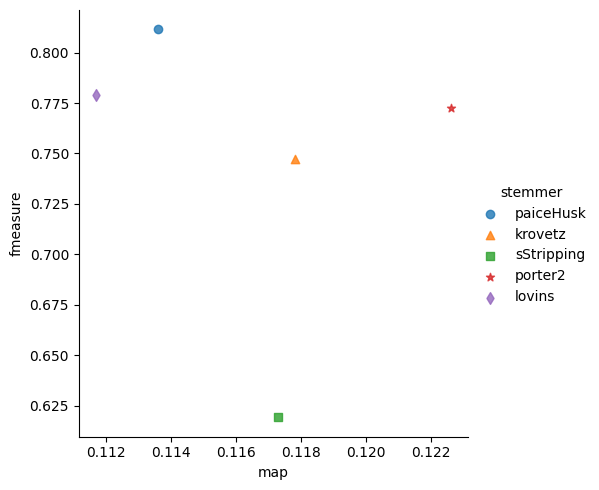

In [37]:
sns.lmplot(target, x="map", y="fmeasure", hue="stemmer", markers=MARKERS[:-2], fit_reg=True)
x = target["map"].to_numpy()
y = target["fmeasure"].to_numpy()
print(f"{stats.pearsonr(x,y)}")

## Statistical Significance

In [26]:
target = data
s = target[target["stemmer"] == "porter2"].loc[:,"map"].tolist()
t = target[target["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,t)}")
print(f"Porter2: {data_avg[data_avg["stemmer"]=="porter2"].loc[:,"map"].tolist()}")
print(f"None: {data_avg[data_avg["stemmer"] == "none"].loc[:,"map"].tolist()}")

TtestResult(statistic=4.2799638071475, pvalue=3.342432226213631e-05, df=148)
Porter2: [0.1226]
None: [0.106]
